### Processamento de Linguagem Natural

### PROCESSAMENTO DE TEXTO E ANÁLISE DE SENTIMENTOS COM PLN




Ozeas Dos Santos Nascimento <br>
Cientista de Dados / Analista de Dados<br>
Linkedin: www.linkedin.com/in/ozeassantos


### INTRODUÇÃO

Com o objetivo de aplicar as práticas de NLP, trouxe aqui a proposta os dados para tratamento de textos e análise de sentimentos. O tema principal é a base de dados textual, levando em consideração textos utilizados em pesquisa de qualidade respondidas em campo aberto pelo usuário.

#### PROBLEMA 
O campo de texto aberto costuma ser problema em qualquer sistema justamente pela complexidade de análise dessa informação. É importante poder usar a informação inserida em campos abertos para entender os principais problemas que ainda não foram endereçados.

#### OBJETIVO 

 O objetivo é utilizar uma base de dados com respostas fornecidas por usuários em campos de texto abertos e criar um código automatizado para ler este dataset, tratar o texto e também tirar insights sobre o sentimento descrito nas respostas. Isso tudo sem a intervenção humana no trabalho, com o intuído de aplicar os as tecnicas de NLP em um caso prático que poderá gerar valor a qualquer empresa.

#### OBJETIVOS ESPECÍFICOS

Para tal objetivo citado anteriormente, precisaremos: 
-	Coletar a base de dados
-	Levantar os principais insights iniciais
-	Identificar as principais colunas
-	Pré-processamento de Texto: Expressões regulares; Tokenization, lemmatization e stemming.
-	Extração de informação
-	Classificação de textos
-	Análise de Sentimento 
-	Confrontar os resultados com os dados iniciais
-	Gerar insights finais sobre a base de dados.

Origem dos dados utilizados:

https://notebook.community/melqkiades/yelp/notebooks/TripAdvisor-Datasets

http://www.cs.cmu.edu/~jiweil/html/hotel-review.html

*Conjuntos de dados do TripAdvisor*

*Este conjunto de dados consiste em 878.561 avaliações (1,3 GB) de 4.333 hotéis rastreados do TripAdvisor*

# Imports


In [1]:
from urllib import request
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import json
from sklearn.cluster import KMeans

import gensim

import re
from nltk.corpus import stopwords
import string

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

import nltk
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.download()
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from textblob.sentiments import NaiveBayesAnalyzer
import textblob

from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

import seaborn as sns 
from sklearn.decomposition import PCA

KeyboardInterrupt: 

# Carrego e tratamento da base

Inicialmente tentamos baixar a base e descompactar para poder usar direto do site, porém o volume da base foi um impecilio, portanto fizemos o download e testamos local.

Parametros do arquivo/bse a ser utilizado

In [ ]:
#url = 'http://www.cs.cmu.edu/~jiweil/html/hotel-review.html'
#file_name = 'review.txt.zip'

Baixando a base de dados

In [ ]:
#request.urlretrieve(url, file_name)

Extração da base de dados

In [ ]:
file_name = 'review.txt/review.txt.zip'

zip = ZipFile(file_name)
zip.extractall()

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\ozeas\\OneDrive\\Documentos\\Estudos\\PROJETOS\\DataScience\\Analise de Sentimentos\\review.txt'

In [ ]:
arquivo = 'review.txt/review.txt'

In [ ]:
os.rename(arquivo, arquivo+'.json')

In [ ]:
arquivo_n = arquivo+'.json'

In [ ]:
arquivo_n = 'review.txt/review.txt.json'

In [ ]:
df = pd.read_json(arquivo_n, lines= True)

Este código é para listar as colunas que foram inseridas na coluna ratings devido a estrutura do json

In [ ]:
list(pd.DataFrame(df['ratings'].to_list()).columns)

['service',
 'cleanliness',
 'overall',
 'value',
 'location',
 'sleep_quality',
 'rooms',
 'check_in_front_desk',
 'business_service_(e_g_internet_access)']

In [ ]:
list(pd.DataFrame(df['author'].to_list()).columns)

['username',
 'num_cities',
 'num_helpful_votes',
 'num_reviews',
 'num_type_reviews',
 'id',
 'location']

Utilizamos estes dois blocos a seguir para fazer o Flatten nested, tornar os campos do json em uma única flat table.

In [ ]:
df1 = df.drop('ratings', axis=1)
df2ratings = pd.json_normalize(df['ratings'])
dfn = df1.merge(df2ratings, left_index=True, right_index=True)

In [ ]:
df1 = dfn.drop('author', axis=1)
df2author = pd.json_normalize(dfn['author'])
dfn2 = df1.merge(df2author, left_index=True, right_index=True)

In [ ]:
dfn2.head(2)

,title,text,date_stayed,offering_id,num_helpful_votes_x,date,id_x,via_mobile,service,cleanliness,...,rooms,check_in_front_desk,business_service_(e_g_internet_access),username,num_cities,num_helpful_votes_y,num_reviews,num_type_reviews,id_y,location_y
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,December 2012,93338,0,2012-12-17,147643103,False,5.0,5.0,...,5.0,NaN,NaN,Papa_Panda,22.0,12.0,29.0,24.0,8C0B42FF3C0FA366A21CFD785302A032,Gold Coast
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",December 2012,93338,0,2012-12-17,147639004,False,5.0,5.0,...,5.0,NaN,NaN,Maureen V,2.0,NaN,2.0,NaN,E3C85CA9DBBBC77E0DB534ABE93E4713,"Sydney, New South Wales, Australia"


Limpeza de colunas que não iremos utilizar

In [ ]:
dfn2 = dfn2.drop(['num_helpful_votes_x','num_helpful_votes_y', 'title', 'via_mobile','num_type_reviews','num_reviews','check_in_front_desk','num_cities','business_service_(e_g_internet_access)','username','id_y','date_stayed','offering_id'], axis=1)

In [ ]:
dfn2.head(2)

,text,date,id_x,service,cleanliness,overall,value,location_x,sleep_quality,rooms,location_y
0,Stayed in a king suite for 11 nights and yes i...,2012-12-17,147643103,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Gold Coast
1,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,147639004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"Sydney, New South Wales, Australia"


Função que vamos utilizar para o pré-processamento na coluna text:

    Removendo as stopwords do texto
    Removendo as pontuções
    Mantendo o texto sem tokenização, ou seja uma string


# Inicio das análises


Em uma rápida verificação, identificamos que as colunas sleep_quality e rooms apresentam registros em branco/nulo (nan).

Com base em nossa analise estatistica, 75% dos clientes estão plenamente satisfeitos com os serviços prestados

In [ ]:
dfn2.describe()

,id_x,service,cleanliness,overall,value,location_x,sleep_quality,rooms
count,8.785610e+05,760918.000000,759835.000000,878561.000000,753695.000000,664904.000000,500903.000000,705404.000000
mean,8.633481e+07,4.069742,4.208512,3.936228,3.896310,4.415007,4.114891,3.921873
std,4.999254e+07,1.179085,1.075466,1.165074,1.179857,0.889482,1.112003,1.149181
min,2.243990e+05,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.488850e+07,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000
50%,1.113905e+08,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,1.283089e+08,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1.478017e+08,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dfn2[['service','cleanliness','overall','value','location_x','sleep_quality','rooms']].isna().sum()

service          117643
cleanliness      118726
overall               0
value            124866
location_x       213657
sleep_quality    377658
rooms            173157
dtype: int64

In [ ]:
print('Porcentagem dados Nulos removidos em service = ', dfn2['service'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em cleanliness = ', dfn2['cleanliness'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em overall = ', dfn2['overall'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em value = ', dfn2['value'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em location_x = ', dfn2['location_x'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em sleep_quality = ', dfn2['sleep_quality'].isna().sum()/dfn2.shape[0],'%')
print('Porcentagem dados Nulos removidos em rooms = ', dfn2['rooms'].isna().sum()/dfn2.shape[0],'%')

Porcentagem dados Nulos removidos em service =  0.1339041910578776 %
Porcentagem dados Nulos removidos em cleanliness =  0.13513688861672668 %
Porcentagem dados Nulos removidos em overall =  0.0 %
Porcentagem dados Nulos removidos em value =  0.14212558945821632 %
Porcentagem dados Nulos removidos em location_x =  0.24318971591044902 %
Porcentagem dados Nulos removidos em sleep_quality =  0.4298597365464663 %
Porcentagem dados Nulos removidos em rooms =  0.19709160775404325 %


In [ ]:
tes = dfn2[['service','cleanliness','overall','value','location_x','sleep_quality','rooms']].dropna()
tes

,service,cleanliness,overall,value,location_x,sleep_quality,rooms
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,4.0,5.0,4.0,4.0,5.0,4.0,4.0
3,5.0,5.0,4.0,5.0,5.0,5.0,5.0
4,4.0,5.0,4.0,3.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...
878548,4.0,5.0,4.0,3.0,4.0,4.0,4.0
878549,5.0,5.0,5.0,5.0,5.0,5.0,5.0
878550,5.0,5.0,5.0,4.0,5.0,5.0,5.0
878551,5.0,5.0,5.0,5.0,5.0,5.0,5.0


#### Clusterização

Nosso objetivo, agora é criar um modelo, que classifique os clientes de nossa base como INSATISFEITOS, NEUTROS E SATISFEITOS, com a intenção de confrontar com nossa analise de sentimentos

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

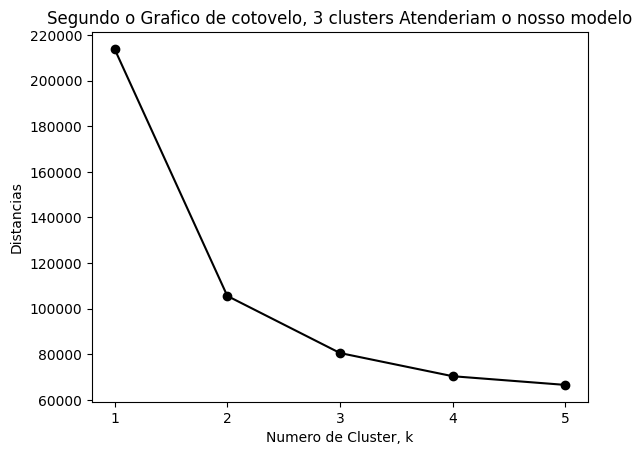

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normaliza = MinMaxScaler()
X_std = normaliza.fit_transform(tes)

ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, max_iter=200, random_state=170).fit(X_std)

    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o', color = 'black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distancias')
plt.title('Segundo o Grafico de cotovelo, 3 clusters Atenderiam o nosso modelo')
plt.xticks(ks)
plt.show()

Segundo o Gráfico de cotovelo, 3 clusters já atenderia o nosso modelo (INSATISFEITOS, NEUTROS E SATISFEITOS).

Novo Dataframe = df_avaliação_cliente

In [ ]:
df_avaliacao_cliente = pd.DataFrame(X_std,columns=['service','cleanliness','overall','value','location_x','sleep_quality','rooms'])

In [ ]:
km = KMeans(n_clusters=3, max_iter=600, random_state=170)
y_pred = km.fit_predict(df_avaliacao_cliente)
df_avaliacao_cliente['Class'] = y_pred
df_avaliacao_cliente

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,service,cleanliness,overall,value,location_x,sleep_quality,rooms,Class
0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1
1,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1
2,0.75,1.0,0.75,0.75,1.00,0.75,0.75,0
3,1.00,1.0,0.75,1.00,1.00,1.00,1.00,1
4,0.75,1.0,0.75,0.50,1.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...
436386,0.75,1.0,0.75,0.50,0.75,0.75,0.75,0
436387,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1
436388,1.00,1.0,1.00,0.75,1.00,1.00,1.00,1
436389,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1


In [ ]:
retorno = normaliza.inverse_transform(X_std)
df_avaliados = pd.DataFrame(retorno, columns=['service','cleanliness','overall','value','location_x','sleep_quality','rooms'])
df_avaliados['Class'] = y_pred

In [ ]:
mapping = {0:'neutro',1: 'satisfeito', 2: 'insatisfeito'}
df_avaliados['Class'] = df_avaliados['Class'].replace(mapping)
df_avaliados

,service,cleanliness,overall,value,location_x,sleep_quality,rooms,Class
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
2,4.0,5.0,4.0,4.0,5.0,4.0,4.0,neutro
3,5.0,5.0,4.0,5.0,5.0,5.0,5.0,satisfeito
4,4.0,5.0,4.0,3.0,5.0,5.0,5.0,satisfeito
...,...,...,...,...,...,...,...,...
436386,4.0,5.0,4.0,3.0,4.0,4.0,4.0,neutro
436387,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
436388,5.0,5.0,5.0,4.0,5.0,5.0,5.0,satisfeito
436389,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito


Clientes classificados como neutros

In [ ]:
neutros = df_avaliados.loc[(df_avaliados['Class']=='neutro')]
neutros

,service,cleanliness,overall,value,location_x,sleep_quality,rooms,Class
2,4.0,5.0,4.0,4.0,5.0,4.0,4.0,neutro
12,4.0,4.0,4.0,4.0,5.0,4.0,4.0,neutro
21,5.0,4.0,4.0,4.0,5.0,4.0,4.0,neutro
32,4.0,4.0,4.0,4.0,4.0,5.0,4.0,neutro
33,5.0,5.0,4.0,4.0,5.0,4.0,3.0,neutro
...,...,...,...,...,...,...,...,...
436378,3.0,5.0,4.0,3.0,4.0,5.0,5.0,neutro
436379,2.0,4.0,3.0,3.0,4.0,5.0,4.0,neutro
436383,4.0,4.0,4.0,4.0,4.0,5.0,4.0,neutro
436386,4.0,5.0,4.0,3.0,4.0,4.0,4.0,neutro


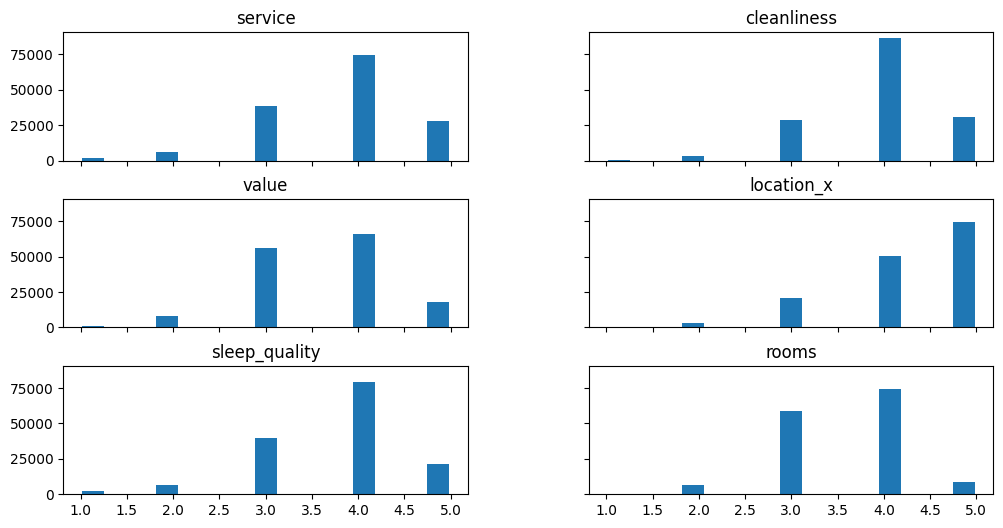

In [ ]:
neutros[['service', 'cleanliness', 'value', 'location_x','sleep_quality','rooms']].hist(
    bins=15,
    figsize=(12, 6),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

Clientes classificados como Satisfeitos

In [ ]:
satisfeitos = df_avaliados.loc[df_avaliados['Class']=='satisfeito']
satisfeitos

,service,cleanliness,overall,value,location_x,sleep_quality,rooms,Class
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
3,5.0,5.0,4.0,5.0,5.0,5.0,5.0,satisfeito
4,4.0,5.0,4.0,3.0,5.0,5.0,5.0,satisfeito
5,5.0,5.0,5.0,4.0,5.0,4.0,5.0,satisfeito
...,...,...,...,...,...,...,...,...
436384,5.0,5.0,5.0,5.0,5.0,4.0,5.0,satisfeito
436385,5.0,5.0,5.0,4.0,4.0,5.0,5.0,satisfeito
436387,5.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfeito
436388,5.0,5.0,5.0,4.0,5.0,5.0,5.0,satisfeito


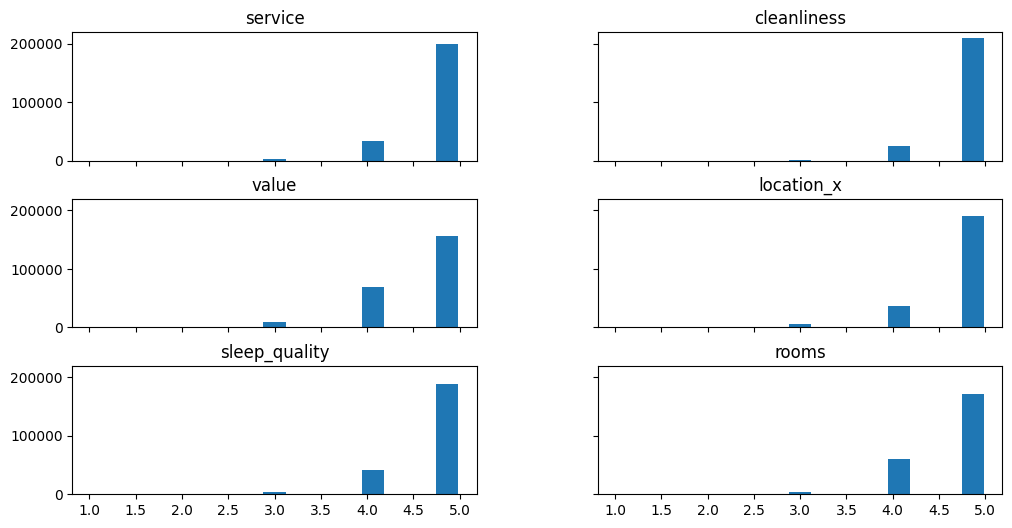

In [ ]:
satisfeitos[['service', 'cleanliness', 'value', 'location_x','sleep_quality','rooms']].hist(
    bins=15,
    figsize=(12, 6),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

Clientes classificados como insatisfeitos

In [ ]:
insatisfeitos = df_avaliados.loc[df_avaliados['Class']=='insatisfeito']
insatisfeitos

,service,cleanliness,overall,value,location_x,sleep_quality,rooms,Class
28,2.0,4.0,1.0,1.0,3.0,2.0,2.0,insatisfeito
35,2.0,3.0,3.0,1.0,5.0,3.0,2.0,insatisfeito
39,2.0,3.0,2.0,1.0,5.0,3.0,3.0,insatisfeito
52,1.0,1.0,1.0,1.0,1.0,1.0,1.0,insatisfeito
67,1.0,1.0,1.0,1.0,1.0,1.0,1.0,insatisfeito
...,...,...,...,...,...,...,...,...
436255,1.0,5.0,3.0,3.0,5.0,3.0,1.0,insatisfeito
436262,3.0,3.0,3.0,3.0,5.0,2.0,2.0,insatisfeito
436279,1.0,4.0,2.0,2.0,4.0,4.0,4.0,insatisfeito
436312,1.0,3.0,2.0,1.0,2.0,1.0,1.0,insatisfeito


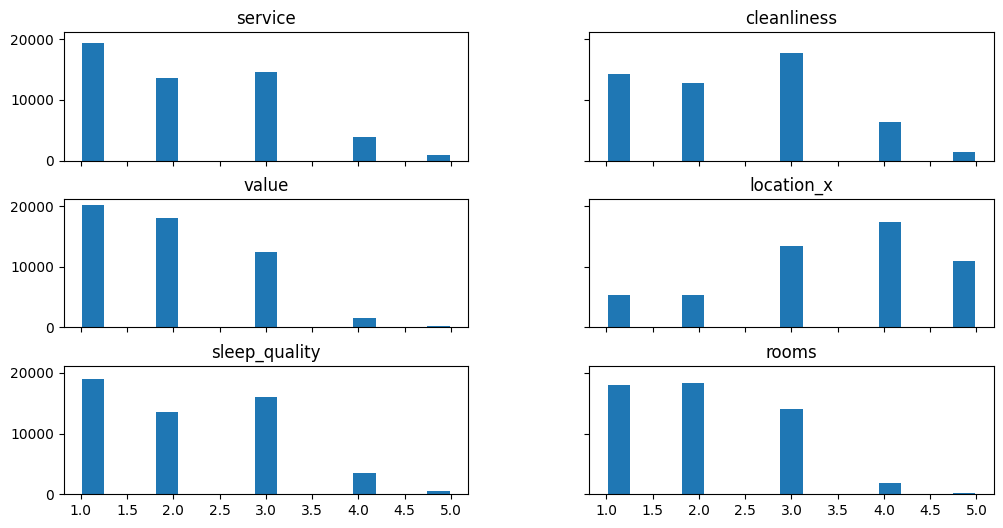

In [ ]:
insatisfeitos[['service', 'cleanliness', 'value', 'location_x','sleep_quality','rooms']].hist(
    bins=15,
    figsize=(12, 6),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

In [ ]:
print('Os clientes SATISFEITOS representam ',(satisfeitos.shape[0]/ df_avaliados.shape[0]) *100,'% de nossa base.')
print('Os clientes NEUTROS representam ',(neutros.shape[0]/ df_avaliados.shape[0]) *100,'% de nossa base.')
print('Os clientes INSATISFEITOS representam ',(insatisfeitos.shape[0]/ df_avaliados.shape[0]) *100,'% de nossa base.')

### Avaliação final das pontuações

Clientes INSATISFEITOS: 12% dos clientes mostram-se neutros quanto ao posicionamento do hotel, porém quanto aos demais serviços prestados, considera-os abaixo da média considerada neutra, não atendendo assim as suas espectativas.

Clientes NEUTROS: Para 34% dos clientes, tantos os serviços prestados quanto a localização estão dentro da média esperada.

Clientes SATISFEITOS: A maioria dos clientes (54%), encontram-se plenamente satisfeitos, tanto com a localização quanto com os serviços internos prestados.

In [ ]:
df_avaliados.groupby('Class').agg({'service':['median','count','min','mean','max'],'cleanliness':['median','count','min','mean','max'],'overall':['median','count','min','mean','max']})

service                             cleanliness               \
              median   count  min      mean  max      median   count  min   
Class                                                                       
insatisfeito     2.0   52422  1.0  2.112224  5.0         2.0   52422  1.0   
neutro           4.0  149136  1.0  3.809784  5.0         4.0  149136  1.0   
satisfeito       5.0  234833  1.0  4.840184  5.0         5.0  234833  1.0   

                            overall                              
                  mean  max  median   count  min      mean  max  
Class                                                            
insatisfeito  2.385792  5.0     2.0   52422  1.0  1.892450  5.0  
neutro        3.970966  5.0     4.0  149136  1.0  3.660914  5.0  
satisfeito    4.886042  5.0     5.0  234833  1.0  4.761635  5.0

In [ ]:
df_avaliados.groupby('Class').agg({'value':['median','min','mean','max'],'location_x':['median','min','mean','max'],'sleep_quality':['median','min','mean','max'],'rooms':['median','min','mean','max']})

value                     location_x                      \
             median  min      mean  max     median  min      mean  max   
Class                                                                    
insatisfeito    2.0  1.0  1.928999  5.0        4.0  1.0  3.445576  5.0   
neutro          4.0  1.0  3.612179  5.0        4.0  1.0  4.304729  5.0   
satisfeito      5.0  1.0  4.624644  5.0        5.0  1.0  4.782607  5.0   

             sleep_quality                      rooms                      
                    median  min      mean  max median  min      mean  max  
Class                                                                      
insatisfeito           2.0  1.0  2.106883  5.0    2.0  1.0  2.007211  5.0  
neutro                 4.0  1.0  3.742182  5.0    4.0  1.0  3.569205  5.0  
satisfeito             5.0  1.0  4.788092  5.0    5.0  1.0  4.714427  5.0

#### Análise e pre processamento das avaliações (Comentários)

In [ ]:
english_stops = stopwords.words('english')

In [ ]:
def df_pre_processamento(texto):

  #Tokenizacao
  texto_n = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)

  #Stop Words
  texto_n = [t for t in texto_n if t not in english_stops]

  #Números
  texto_n = [re.sub(r"\d","",t) for t in texto_n]

  #Pontuação
  texto_n = [t for t in texto_n if t not in string.punctuation]
  
  texto_n_str = ' '.join(texto_n).lower()

  return texto_n_str

Mudamos os tipos das colunas que vieram como resquícios do json

In [ ]:
dfn2['text'] = dfn2['text'].astype(pd.StringDtype())
dfn2['location_y'] = dfn2['location_y'].astype(pd.StringDtype())

In [ ]:
dfn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878561 entries, 0 to 878560
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   text           878561 non-null  string        
 1   date           878561 non-null  datetime64[ns]
 2   id_x           878561 non-null  int64         
 3   service        760918 non-null  float64       
 4   cleanliness    759835 non-null  float64       
 5   overall        878561 non-null  float64       
 6   value          753695 non-null  float64       
 7   location_x     664904 non-null  float64       
 8   sleep_quality  500903 non-null  float64       
 9   rooms          705404 non-null  float64       
 10  location_y     878561 non-null  string        
dtypes: datetime64[ns](1), float64(7), int64(1), string(2)
memory usage: 73.7 MB


Aplicação dos metodos na coluna text e salvando na nova coluna text_sem_stopwords

In [ ]:
dfn2['text_sem_stopwords'] = dfn2['text'].progress_apply(df_pre_processamento)

  0%|          | 0/878561 [00:00<?, ?it/s]

In [ ]:
dfn2['text_sem_stopwords'] = dfn2['text_sem_stopwords'].astype(pd.StringDtype())

In [ ]:
dfn2['text_sem_stopwords']

0         stayed king suite nights yes cots us bit happy...
1         on every visit nyc hotel beacon place love sta...
2         this great property midtown we two different r...
3         the andaz nice hotel central location manhatta...
4         i stayed us andaz properties one best much bet...
                                ...                        
878556    pænt hotel et livligt miljø store værelser eno...
878557    un excellent hotel pour un prix raisonnable un...
878558    l'hotel situato una zona tranquilla e due pass...
878559    sehr schön ausgestattetes hotel bester lage zu...
878560    el hotel está entre el aeropuerto washington m...
Name: text_sem_stopwords, Length: 878561, dtype: string

### Bigramas

Nuvem de palavras com as mais utilizadas nas respostas

In [ ]:
all_words_lem = ' '.join([word for word in dfn2['text_sem_stopwords']])

In [ ]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
token = nltk.word_tokenize(all_words_lem)

In [ ]:
freq_termos_tokens = FreqDist(token)

Top 15 termos mais comuns

In [ ]:
freq_termos_tokens.most_common(20)

In [ ]:
top_termos = freq_termos_tokens.most_common(20)

fdist = pd.Series(dict(top_termos))

sns.barplot(y=fdist.index, x=fdist.values);

### Tratamento de sentimentos no texto

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
dfn2['polarity'] = dfn2['text_sem_stopwords'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
dfn2  = pd.concat(
    [dfn2 .drop(['polarity'], axis=1), 
     dfn2 ['polarity'].apply(pd.Series)], axis=1)

In [ ]:
conditions = [
  (dfn2['compound']<0),
  (dfn2['compound']==0),
  (dfn2['compound']>0)
  ]

values = ['negative', 'neutral', 'positive']

dfn2['sentimento'] = np.select(conditions, values)

In [ ]:
dfn2['sentimento'] = dfn2['sentimento'].astype(pd.StringDtype())
dfn2.info()

In [ ]:
dfn2 = dfn2.drop(['neg','neu','pos'], axis=1)

In [ ]:
dfn2['sentimento'].unique()

### NPS

**Net Promoter Score (NPS).**

Através de uma pesquisa quanti-qualitativa, podemos ter um panorama sobre a fidelidade dos seus clientes e quão satisfeitos estão com o que sua empresa oferece.

Os clientes que dão uma nota de 0 a 6 são considerados detratores, ou seja, não 

1.   Os clientes que dão uma nota de 0 a 6 são considerados detratores, ou seja, não estão satisfeitos
2.   Os clientes que dão nota 7 ou 8 são considerados passivos/neutros: não estão insatisfeitos, mas também não são leais
3.   Já os clientes que dão nota entre 9 e 10 são considerados promotores: aqueles que amam a sua empresa e provavelmente recomendam sua empresa

Na base que utilizamos, não temos o classico NPS com a avaliação entre 1 a 10 e por isso vamos utilizar uma regra para poder fazer a classificação usando o overall entre 1 e 5.

Aqui vamos utilizar uma condição para categorizar nossos overalls em NPS, assim teremos uma leitura mais clara de quem teve sentimento diferente da avaliação. Como por exemplo: Sentimento positivo e NPS detrator.

In [ ]:
conditions = [
  (dfn2['overall']<=3),
  (dfn2['overall']==4),
  (dfn2['overall']>=5)
    ]

values = ['detratores', 'passivos', 'promotores']

dfn2['nps'] = np.select(conditions, values)

In [ ]:
dfn2.head(10)

In [ ]:
a_df=dfn2.drop_duplicates(['sentimento','nps'])[['sentimento','nps']]
a_df.head(10)

### Análise confrontando as notas de NPS e o Sentimento encontrado no texto de campo aberto preenchido pelo cliente

A ideia a partir deste resultado é buscar entender porque alguns clientes dão notas opostas em ambos os campos, texto aberto descritivo x a nota informada.
Quando olhamos para os registros com sentimento positivo e nps detrator, no ano de 2012, podemos perceber que dentre as notas informas que compoem o overall, o principal impacto está no valor da acomodação.

In [ ]:
df_sentimento_nps = dfn2.loc[(dfn2['sentimento'] == 'positive') & (dfn2['nps'] == 'detratores') & (dfn2['date'].dt.year == 2012) & (dfn2['location_y'].notnull() & (dfn2['location_y'] != ''))]

In [ ]:
df_sentimento_nps = df_sentimento_nps.drop(['text','date','id_x','location_y','sentimento','nps','text_sem_stopwords','compound','overall'], axis=1)

In [ ]:
df_sentimento_nps.mean().sort_values()

A ideia a partir deste resultado é buscar entender porque alguns clientes dão notas opostas em ambos os campos, texto aberto descritivo x a nota informada.
Quando olhamos para os registros com sentimento positivo e nps detrator, no ano de 2012, podemos perceber que dentre as notas informas que compoem o overall, o principal impacto também está no valor da acomodação.

In [ ]:
df_nps_sentimento = dfn2.loc[(dfn2['sentimento'] == 'negative') & (dfn2['nps'] == 'promotores') & (dfn2['date'].dt.year == 2012) & (dfn2['location_y'].notnull() & (dfn2['location_y'] != ''))]

In [ ]:
df_nps_sentimento.head()

In [ ]:
df_nps_sentimento = df_nps_sentimento.drop(['text','date','id_x','location_y','sentimento','nps','text_sem_stopwords','compound','overall'], axis=1)

In [ ]:
df_nps_sentimento.mean().sort_values()